# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
#Leitura do arquivo csv do DataFrame:

df_encoded = pd.read_csv('df_encoded_inadimplencia.csv')
df_encoded.shape

(16650, 30)

In [3]:
df_encoded.info()

# Todas as variáveis estao em formato numerico e não há valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   sexo                                    16650 non-null  int64  
 2   posse_de_veiculo                        16650 non-null  int64  
 3   posse_de_imovel                         16650 non-null  int64  
 4   qtd_filhos                              16650 non-null  int64  
 5   idade                                   16650 non-null  float64
 6   tempo_emprego                           16650 non-null  float64
 7   possui_celular                          16650 non-null  int64  
 8   possui_fone_comercial                   16650 non-null  int64  
 9   possui_fone                             16650 non-null  int64  
 10  possui_email                            16650 non-null  in

In [4]:
df_encoded.isna().sum()

# Aqui verificamos mais uma vez que não há valores NA, 'missings'

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [5]:
df_encoded.drop_duplicates()

#Não existem dados duplicados 

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,0,0,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,1,0,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,1,0,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,0,0,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,0,0,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [6]:
# Separando as variaveis explicativas da target = 'mau'

y = df_encoded['mau']
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [7]:
X = df_encoded.drop('mau',axis=1)
X

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,0,0,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,1,0,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,1,0,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,0,0,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,0,0,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [8]:
#Separando as variáveis entre treino e teste: 70% da base para treinamento e 30% para validação

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
# 1) Objeto com funçao de Arvore de Decisão:
clf = DecisionTreeClassifier(random_state=123)

In [10]:
# 2) Treino do modelos de dados:
clf = clf.fit(X_train, y_train)

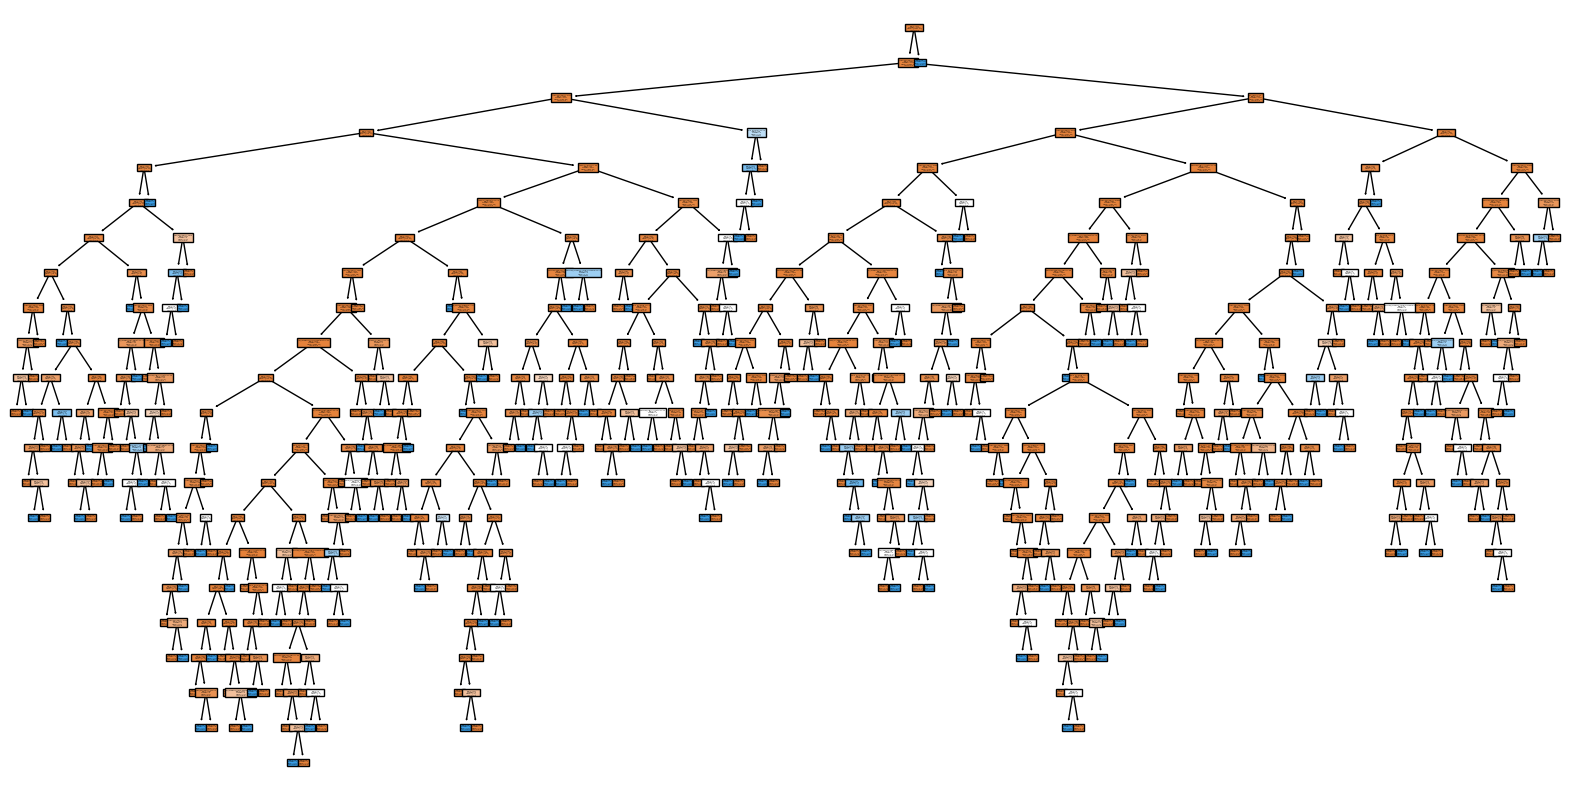

In [11]:
# 3) Visualização da Arvore:
plt.figure(figsize=(20,10))
plot_tree(clf,
         filled=True,
         class_names=['Bom', 'Mau'],
         feature_names=X_train.columns);

In [12]:
# 4) Previsão nos dados de treinamento:
predict = clf.predict(X_train)

In [13]:
#Matriz de Confusão da base treinamento:
matriz_confusao_treino = confusion_matrix(y_train, predict)
matriz_confusao_treino

array([[11382,     0],
       [    0,   273]], dtype=int64)

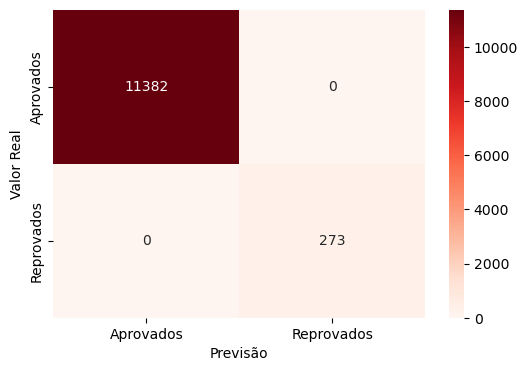

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_treino,
            annot=True,
            fmt="d",
            xticklabels=['Aprovados', 'Reprovados'],
            yticklabels=['Aprovados', 'Reprovados'],
            cmap="Reds")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show();

In [15]:
# 5) Acurácia na base de treinamento
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [16]:
# 1) Mesma classificacao da base de testes de acordo com a árvore no item 2:
clf = DecisionTreeClassifier(random_state=123)
clf = clf.fit(X_train, y_train)

In [17]:
# 2) Matriz de Confusão da base de teste:
predict = clf.predict(X_test)
matriz_confusao_teste = confusion_matrix(y_test, predict)
matriz_confusao_teste

array([[4823,   55],
       [  38,   79]], dtype=int64)

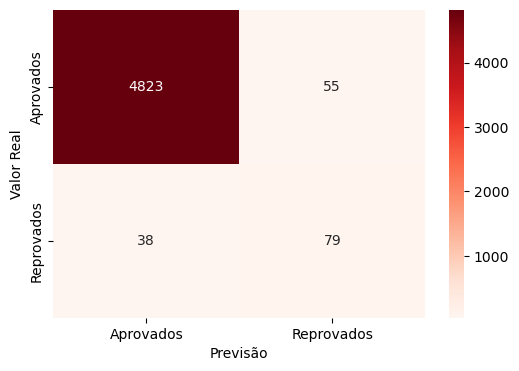

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_teste,
            annot=True,
            fmt="d", xticklabels=['Aprovados', 'Reprovados'],
            yticklabels=['Aprovados', 'Reprovados'],
            cmap="Reds")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")

plt.show();

In [19]:
# 3) Acuracia da base de teste está bem parecida com a acuracia da base de treinamento
# Acurácia na base de treinamento = 0.9878163878163878
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9813813813813814

In [20]:
# 4) Nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10: tem os mesmos resultados anteriores
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
matriz_confusao_teste = confusion_matrix(y_test, predict)
matriz_confusao_teste

array([[4868,   10],
       [  54,   63]], dtype=int64)

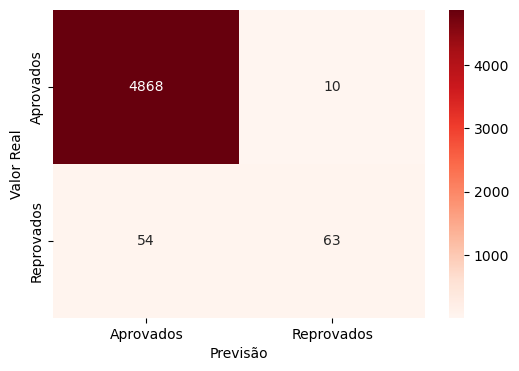

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_teste,
            annot=True,
            fmt="d", xticklabels=['Aprovados', 'Reprovados'],
            yticklabels=['Aprovados', 'Reprovados'],
            cmap="Reds")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")

plt.show();

In [22]:
accuracy_score(y_test, predict)

0.9871871871871872

In [23]:
# A proporção de proponentes foram classificados como 'maus' foi de 1.097%
proporcao_maus = 54/(4868 + 54) * 100
proporcao_maus

1.0971149939049167

In [24]:
# 5) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'? 
acuracia_todos_bons = (4868/ (4868 + 10)) * 100
acuracia_todos_bons

99.7949979499795